This script plots the results of uncertainty analysis of PMF model. (Bootstrap + DISP)

In [1]:
import os, importlib, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import join, isfile
sys.path.append('../../code/src')
#importlib.reload(sys.modules['box_model_source_apportionment'])
#from box_model_source_apportionment import treat_box_model_output

In [139]:
filepath = '../../data/intermediate/PMF_output/Factor9_BaseErrorEstimationSummary.csv'
with open(filepath, 'r') as f:
    lines = f.readlines()

a = 0
# select line start from 'Concentration'
line_start = [line for line in lines if line.startswith('Concentration')]
df_all = pd.DataFrame()

for i in range(len(line_start)):

    # get factor name
    factor_name = line_start[i][19:-3]

    # get index of start line of a factor to get df of a factor
    line_start_index = [lines.index(line) for line in [line_start[i]]]
    df = pd.read_csv(filepath, skiprows=line_start_index[0]+1, nrows=43)
    column_name = df.columns
    df = df.reset_index().iloc[:,0:-1]
    df.columns = column_name

    df_all = df_all.append(df)

In [135]:
df_base_sum = df_all.groupby('Species').sum().reset_index()[['Species','Base Value']]
df_base_sum.columns = ['Species','Base Sum']

In [140]:
df_prec = df.merge(df_base_sum, on='Species', how='left')
df_prec['Base Value'] = df_prec['Base Value']/df_prec['Base Sum']
df_prec['BS 25th'] = df_prec['BS 25th']/df_prec['Base Sum']
df_prec['BS 75th'] = df_prec['BS 75th']/df_prec['Base Sum']
df_prec['BS 50th'] = df_prec['BS 50th']/df_prec['Base Sum']

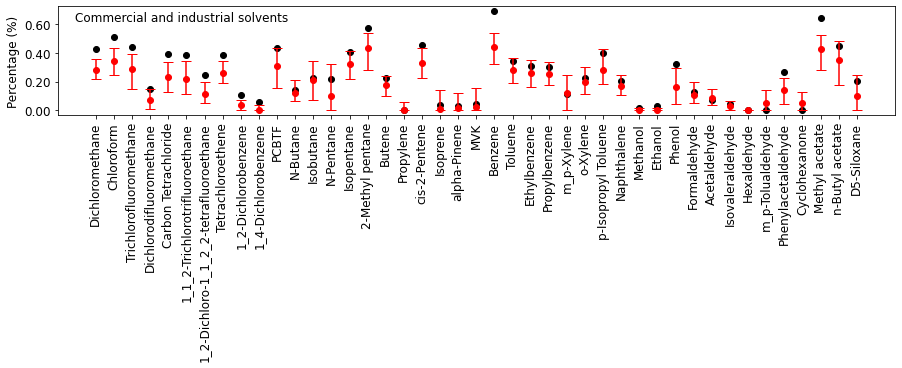

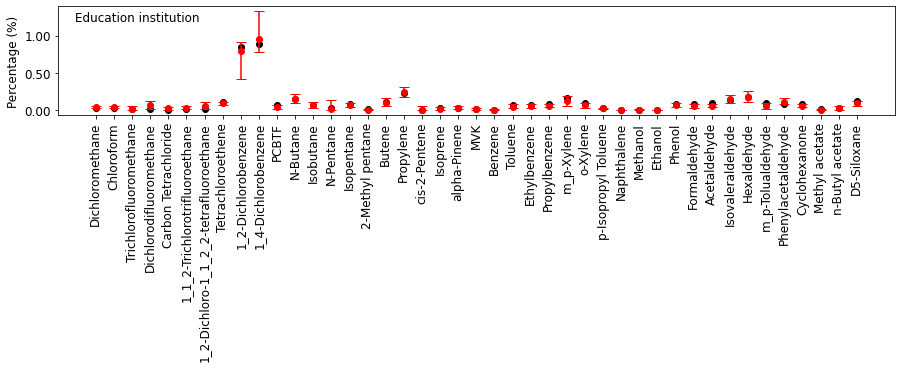

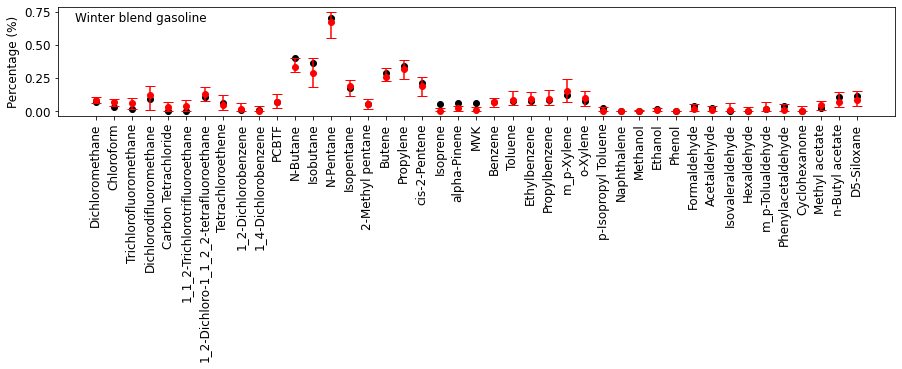

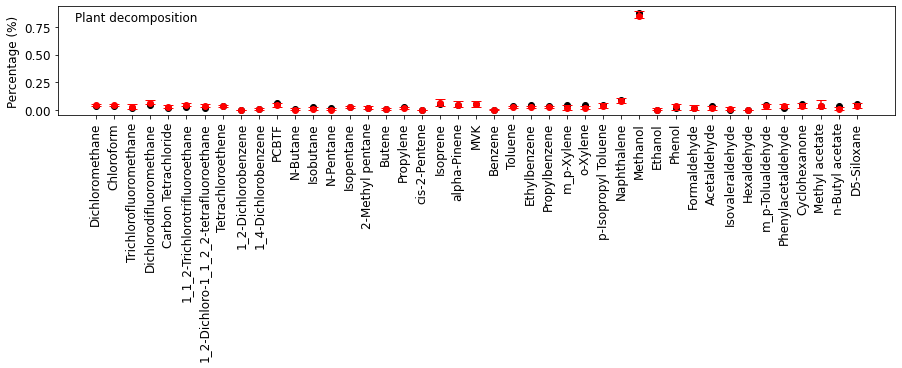

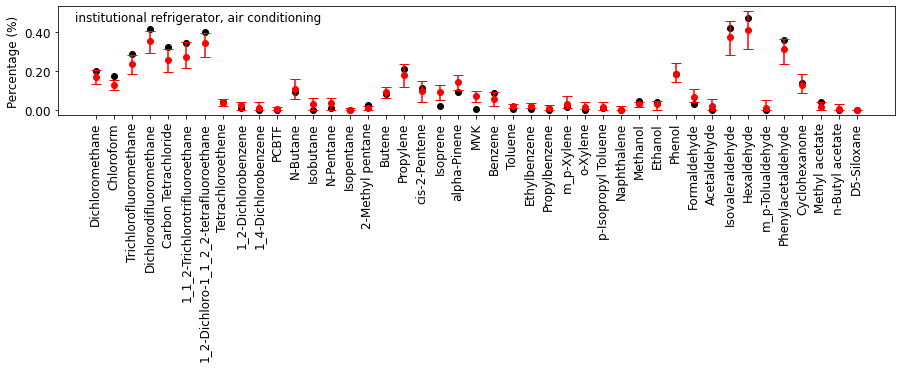

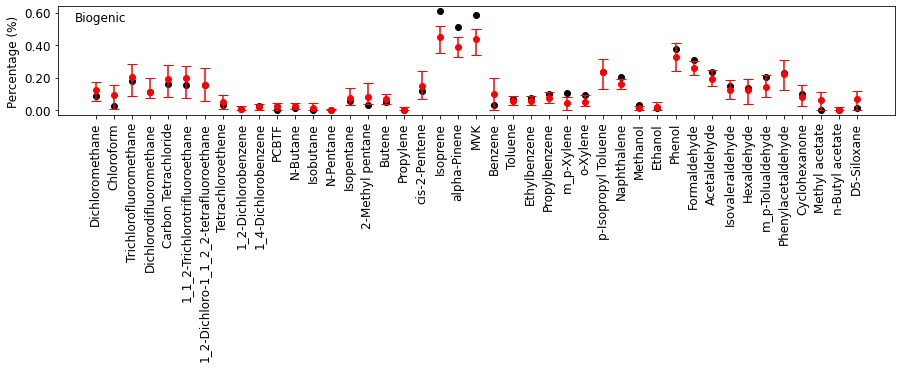

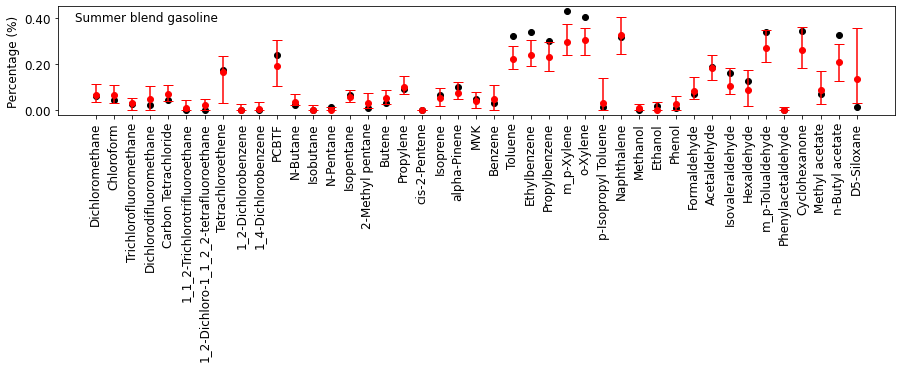

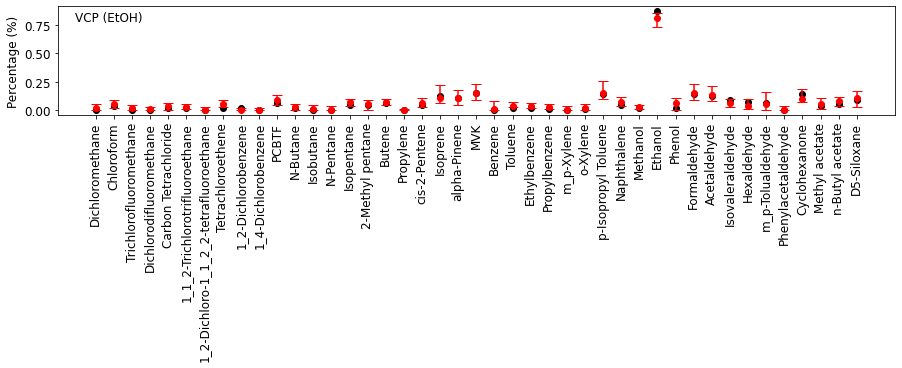

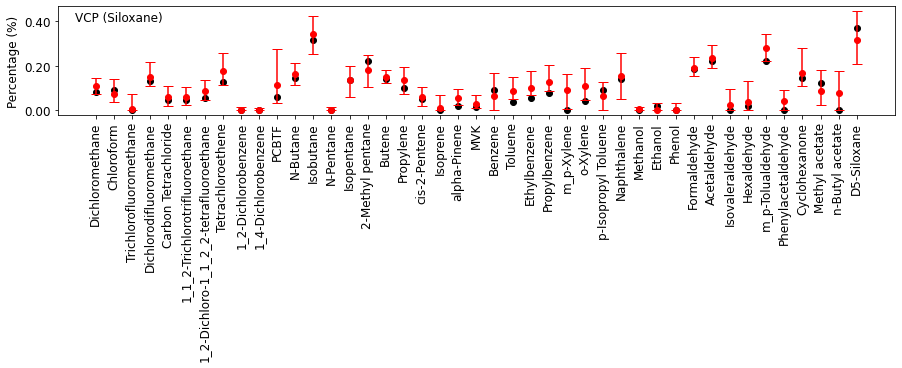

In [188]:
from matplotlib.ticker import FormatStrFormatter

for i in range(len(line_start)):

    # get factor name
    factor_name = line_start[i][19:-3]

    # get index of start line of a factor to get df of a factor
    line_start_index = [lines.index(line) for line in [line_start[i]]]
    df = pd.read_csv(filepath, skiprows=line_start_index[0]+1, nrows=43)
    column_name = df.columns
    df = df.reset_index().iloc[:,0:-1]
    df.columns = column_name

    # get precentage
    df_prec = df.merge(df_base_sum, on='Species', how='left')
    df_prec['Base Value'] = df_prec['Base Value']/df_prec['Base Sum']
    df_prec['BS 25th'] = df_prec['BS 25th']/df_prec['Base Sum']
    df_prec['BS 75th'] = df_prec['BS 75th']/df_prec['Base Sum']
    df_prec['BS 50th'] = df_prec['BS 50th']/df_prec['Base Sum']

    # make plot
    plt.rc('font', size=12)
    fig, ax=plt.subplots(figsize=(15,2))

    ax.errorbar(df_prec['Species'], df_prec['BS 50th'], 
                yerr=[df_prec['BS 50th']-df_prec['BS 25th'], 
                      df_prec['BS 75th']-df_prec['BS 50th']], 
                fmt='o', color='red', capsize=5)
    ax.scatter(df_prec['Species'], df_prec['Base Value'], label='Base value', color='black')

    #ax.set_ylim(0, 1.1)
    #ax.axes.xaxis.set_ticklabels([])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylabel('Percentage (%)')
    plt.text(0.02, 0.9, factor_name,
             horizontalalignment='left',verticalalignment='center',
             transform = ax.transAxes)
    plt.xticks(rotation=90)

    plt.show()
    figpath = '../../result/pmf_BS_uncertainty_'+factor_name.replace(' ', '_')+'.png'
    fig.savefig(figpath, dpi=1200, bbox_inches='tight', facecolor='w')